In [1]:
import os 
import sys
# parant directory
sys.path.append(os.path.abspath('..'))


from pyotp import TOTP
from algo_artha.broker_api import shoonya
import pandas as pd
from pprint import pprint
import datetime as dt 
import yaml
import json
import time
from time import sleep
import numpy as np

In [2]:
os.getcwd()

'c:\\My-Files\\Projects\\python\\algo-artha\\research'

In [3]:
api = shoonya.Api()
with open("../config/shoonya_api_configs.yaml", 'r') as fh:
    cred = yaml.safe_load(fh)

ret = api.login(
    userid=cred['userId'],
    password=cred['password'],
    twoFA=TOTP(cred['twoFA']).now(),
    vendor_code=cred['vendorCode'],
    api_secret=cred['apiSecret'],
    imei=cred['imei']
)

ret['stat']

'Ok'

In [4]:
nse_tickers = pd.read_csv('../data/shoonya/NSE_symbols.txt')
nse_tickers.drop(['Unnamed: 7'], axis=1, inplace=True)
nse_tickers[nse_tickers['Instrument'] == 'EQ'].sample(20)

,Exchange,Token,LotSize,Symbol,TradingSymbol,Instrument,TickSize
1610,NSE,7287,1,JTLIND,JTLIND-EQ,EQ,0.01
1092,NSE,30089,1,ORIENTCEM,ORIENTCEM-EQ,EQ,0.01
1268,NSE,4204,1,MOTHERSON,MOTHERSON-EQ,EQ,0.01
1561,NSE,13121,1,KERNEX,KERNEX-EQ,EQ,0.05
137,NSE,3646,1,VARDMNPOLY,VARDMNPOLY-EQ,EQ,0.01
2429,NSE,18244,1,DEEPENR,DEEPENR-EQ,EQ,0.01
980,NSE,13941,1,PRAENG,PRAENG-EQ,EQ,0.01
2192,NSE,1127,1,GHCL,GHCL-EQ,EQ,0.05
2168,NSE,1168,1,GMBREW,GMBREW-EQ,EQ,0.05
1219,NSE,4014,1,NAVA,NAVA-EQ,EQ,0.05


In [16]:
lastBusDay = dt.datetime.today()
lastBusDay = lastBusDay.replace(hour=9, minute=15, second=0, microsecond=0) - dt.timedelta(days=5)
ret = api.get_time_price_dataframe(exchange='NSE', token='17869', starttime=lastBusDay.timestamp(), interval=5)

In [17]:
ret

,open,high,low,close,vwap,volume
time,,,,,,
2024-07-01 09:15:00,739.45,744.55,736.50,741.65,740.03,163943.0
2024-07-01 09:20:00,741.80,744.85,739.55,741.60,742.52,92786.0
2024-07-01 09:25:00,741.40,741.60,737.50,739.50,739.66,49946.0
2024-07-01 09:30:00,739.90,742.00,739.00,740.95,740.82,27515.0
2024-07-01 09:35:00,741.10,742.60,739.85,740.85,741.48,29175.0
...,...,...,...,...,...,...
2024-07-04 15:05:00,726.75,726.85,725.20,726.15,726.12,58207.0
2024-07-04 15:10:00,725.40,726.20,725.05,725.60,725.82,49270.0
2024-07-04 15:15:00,725.65,725.70,723.05,723.05,724.88,74988.0


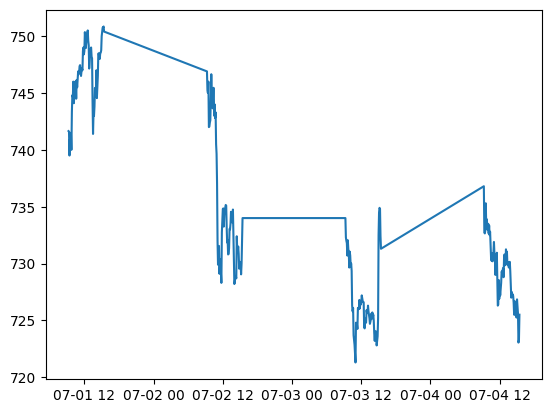

In [18]:
import matplotlib.pyplot as plt 

plt.plot(ret['close'])
plt.plot()
plt.show()

In [19]:
import pandas_ta as ta

In [20]:
CustomStrategy = ta.Strategy(
    name="Momo and Volatility",
    description="SMA 50,200, BBANDS, RSI, MACD and Volume SMA 20",
    ta=[
        {"kind": "sma", "length": 50},
        {"kind": "sma", "length": 200},
        {"kind": "bbands", "length": 20},
        {"kind": "rsi"},
        {"kind": "macd", "fast": 8, "slow": 21},
        {"kind": "sma", "close": "volume", "length": 20, "prefix": "VOLUME"},
    ]
)
# To run your "Custom Strategy"
ret.ta.strategy(CustomStrategy)

In [27]:
ret.tail()

,open,high,low,close,vwap,volume,SMA_50,SMA_200,BBL_20_2.0,BBM_20_2.0,BBU_20_2.0,BBB_20_2.0,BBP_20_2.0,RSI_14,MACD_8_21_9,MACDh_8_21_9,MACDs_8_21_9,VOLUME_SMA_20
time,,,,,,,,,,,,,,,,,,
2024-07-04 15:05:00,726.75,726.85,725.20,726.15,726.12,58207.0,728.560,729.22750,724.110144,727.3475,730.584856,0.890181,0.315050,42.534207,-0.949787,0.073569,-1.023356,20416.55
2024-07-04 15:10:00,725.40,726.20,725.05,725.60,725.82,49270.0,728.434,729.17025,724.060887,727.1225,730.184113,0.842118,0.251357,40.055515,-0.940666,0.066152,-1.006818,22059.15
2024-07-04 15:15:00,725.65,725.70,723.05,723.05,724.88,74988.0,728.278,729.12550,723.479303,726.7925,730.105697,0.911731,-0.064787,31.027485,-1.250062,-0.194595,-1.055467,25279.65
2024-07-04 15:20:00,723.00,724.85,722.10,723.30,723.37,79448.0,728.136,729.09250,723.154429,726.4575,729.760571,0.909364,0.022036,32.630648,-1.410744,-0.284222,-1.126522,27866.00
2024-07-04 15:25:00,723.40,726.00,723.20,725.50,724.73,49354.0,728.066,729.06375,723.370092,726.2250,729.079908,0.786232,0.373026,44.791747,-1.206970,-0.064358,-1.142612,29455.30


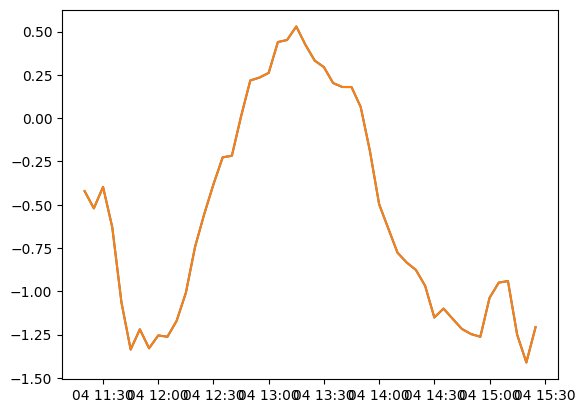

In [35]:

# plt.plot(ret['MACD_8_21_9'].iloc[-50:])
plt.plot(ret['MACD_8_21_9'].iloc[-50:])
plt.plot(ret['MACD_8_21_9'].iloc[-50:])
plt.show()

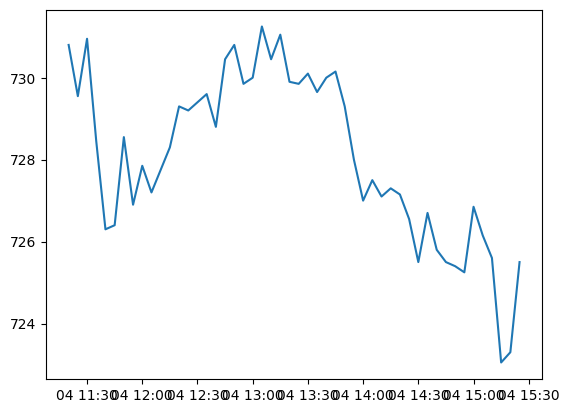

In [33]:
plt.plot(ret['close'].iloc[-50:])
plt.show()

In [54]:
df = pd.read_csv('../data/nifty-total-market.csv')
df.drop(['unnamed:'], axis=1, inplace=True)
df.to_csv("../data/nifty-total-market.csv", index=False)

,Unnamed: 0,symbol,open,high,low,close,ltp,volume,value,52wh,52l,30d_chng,365d_chng
0,0,MAZDOCK,"4,715.10","5,621.45","4,670.00","4,684.55","5,621.45","2,08,95,888","10,841.64","5,621.45","1,262.25",43.8,265.04
1,1,HONASA,438.9,503,436.55,435.05,502,"74,81,624",353.04,511,256.3,-5.07,-
2,2,OPTIEMUS,322.3,389.1,318,324.25,372.85,"27,14,578",99.89,389.1,201.95,28.01,54.26
3,3,GALAXYSURF,"2,781.00","3,208.05","2,776.10","2,772.30","3,128.00","2,03,705",61.58,"3,208.05","2,247.00",12.07,4.63
4,4,ASTRAZEN,"6,399.00","7,572.20","6,398.10","6,398.10","7,170.00","4,58,354",327.64,"7,572.20","3,700.00",5.45,70.7


,symbol,open,high,low,close,ltp,volume,value,52wh,52l,30d_chng,365d_chng
0,MAZDOCK,"4,715.10","5,621.45","4,670.00","4,684.55","5,621.45","2,08,95,888","10,841.64","5,621.45","1,262.25",43.8,265.04
1,HONASA,438.9,503,436.55,435.05,502,"74,81,624",353.04,511,256.3,-5.07,-
2,OPTIEMUS,322.3,389.1,318,324.25,372.85,"27,14,578",99.89,389.1,201.95,28.01,54.26
3,GALAXYSURF,"2,781.00","3,208.05","2,776.10","2,772.30","3,128.00","2,03,705",61.58,"3,208.05","2,247.00",12.07,4.63
4,ASTRAZEN,"6,399.00","7,572.20","6,398.10","6,398.10","7,170.00","4,58,354",327.64,"7,572.20","3,700.00",5.45,70.7
